In [3]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
data = pd.read_csv('../data/market_data.csv').drop(columns=['Unnamed: 0', 'Time'])
num_of_ts = data.shape[1]
data_numpy = data.values.T
np.random.shuffle(data_numpy)
train = data_numpy[:num_of_ts/2, :]
test = data_numpy[num_of_ts/2:, :]

## Functions

In [117]:
def mean_std_inference(data, n):
    """For each time series, calculates, mean and std on first part.
    Buy when value lower than mean - n * std, Sell when values higher than
    mean + n * std.
    """
    trade = np.zeros((data.shape[0], 2), dtype=float)
    for i in range(data.shape[0]):
        first_mean, first_std = data[i, :60].mean(), data[i, :60].std()
        min_achieved = False
        for val in data[i, 60:]:
            if val < first_mean - n * first_std:
                trade[i, 0] = val
                min_achieved = True
            if min_achieved and val > first_mean + n * first_std:
                trade[i, 1] = val

                break
    cost_function_n = np.sum(trade[:, 1] - trade[:, 0])
    return cost_function_n


def mean_std_training(data, n_parameters=np.linspace(.01, 1, 20)):
    """Cacluclates revenue for ginve range of parameters"""
    cost_function = []
    for n in np.linspace(.01, 1, 20):
        cost_function_n = mean_std_inference(data, n)
        cost_function.append(cost_function_n)
        print 'We have earned {:.3f} with gap parameter = {:.2f}'.format(cost_function_n, n)
    return cost_function


## Training

In [119]:
cost_function = mean_std_training(data=train)

We have earned 0.195 with gap parameter = 0.01
We have earned 0.206 with gap parameter = 0.06
We have earned 0.217 with gap parameter = 0.11
We have earned 0.231 with gap parameter = 0.17
We have earned 0.239 with gap parameter = 0.22
We have earned 0.240 with gap parameter = 0.27
We have earned 0.248 with gap parameter = 0.32
We have earned 0.248 with gap parameter = 0.37
We have earned 0.233 with gap parameter = 0.43
We have earned 0.213 with gap parameter = 0.48
We have earned 0.195 with gap parameter = 0.53
We have earned 0.171 with gap parameter = 0.58
We have earned 0.144 with gap parameter = 0.64
We have earned 0.108 with gap parameter = 0.69
We have earned 0.075 with gap parameter = 0.74
We have earned 0.048 with gap parameter = 0.79
We have earned 0.017 with gap parameter = 0.84
We have earned -0.012 with gap parameter = 0.90
We have earned -0.034 with gap parameter = 0.95
We have earned -0.051 with gap parameter = 1.00


So far the best parameter is: **$ n = \frac{(0.35 + 0.37)}{ 2}$**

## Let's visualize the cost function

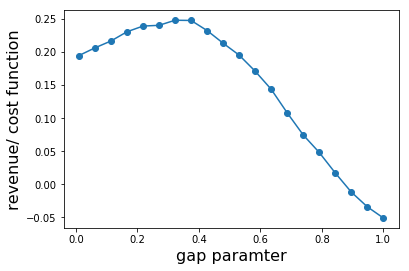

In [131]:
plt.plot(np.linspace(.01, 1, 20), cost_function, marker='o');
plt.xlabel('gap paramter', fontsize=16);
plt.ylabel('revenue/ cost function', fontsize=16);

## Testing

In [129]:
print 'Result on Test set is {:.3f} with n = {:.3f}'.format(mean_std_inference(data=test, n=.345), .345)

Result on Test set is 0.259 with n = 0.345


## Conclusion

This approach is when simpler thatn approach in notebook #2, and the reasults are very similar.

The results are for test are almost the same as for train (even a bit better).
For full data set it should be:

$$ 0.259 \cdot 2 \approx .52 $$
